In [8]:
import ...helperfunctions

SyntaxError: invalid syntax (<ipython-input-8-114a2a89ac35>, line 1)

In [24]:
# file load

In [25]:
# helpful plotting

In [26]:
# vectoral plotting

In [1]:
from time import time
import numpy as np

def tic():
    global current_time
    current_time = time()


def toc(return_numeric=False):
    if return_numeric:
        return time() - current_time
    else:
        print('process completed in {:.2f}s'.format(time() - current_time))
    
def maxwell_coeffs(model_dict):
    Ee = model_dict['Ee']
    E_arms = np.array([arm['E'] for arm in model_dict['arms']])  # gets all the elastic stiffnesses for the arms
    T_arms = np.array([arm['T'] for arm in model_dict['arms']])  # gets all the time constants for the arms

    s = symbols('s')  # defines the laplace domain variable, s
    Q = Ee + sum((E_arms * T_arms * s) / (1 + T_arms * s))  # define the relaxance equation in the laplace domain
    Q_n = Q.normal()  # groups the relaxance equation into a single term and simplifies
    u_n = collect(expand(denom(Q_n)), s)  # simplifies the denominator and collects the coefficients of the polynomials
    q_n = collect(expand(numer(Q_n)), s)
    # returns in order n: 0, 1, 2, 3, ... N
    return np.array([u_n.coeff(s, i) for i in range(E_arms.size + 1)]).astype(float), \
           np.array([q_n.coeff(s, i) for i in range(E_arms.size + 1)]).astype(float)

0.00 % Complete
10.00 % Complete
20.00 % Complete
30.00 % Complete
40.00 % Complete
50.00 % Complete
60.00 % Complete
70.00 % Complete
80.00 % Complete
90.00 % Complete


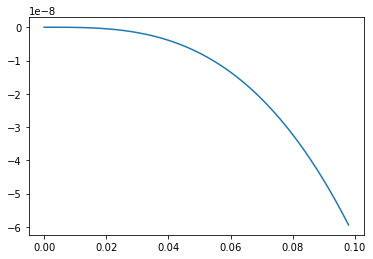

In [158]:
import matplotlib.pyplot as plt

# time settings
dt = 1e-3  # s SETTING berkin suggests mHz
tF = 0.1  # s SETTING
tI = 0  # s

# array settings based on memory
max_array_length = 10  # SETTING
length_full = int(tF / dt)
num_chunks = 10 #int(length_full / max_array_length)

# defining chunked arrays
time = np.arange(tI, max_array_length * dt, dt)

zb = np.zeros(time.shape)
zt = np.zeros(time.shape)
vt = np.zeros(time.shape)
at = np.zeros(time.shape)

ht = np.zeros(time.shape)

# experiment settings - sampling
sampling_freq = 1 / (2 * dt)  # SETTING
get_every = int(1 / (sampling_freq * dt))

# experimental datastreams
exp_tip_pos = np.zeros(int(tF * sampling_freq))
exp_base_pos = np.zeros(int(tF * sampling_freq))
exp_deflection = np.zeros(int(tF * sampling_freq))
exp_time = np.zeros(int(tF * sampling_freq))

for iteration in range(num_chunks):
    print('{:.2f} % Complete'.format(100 * iteration / num_chunks))
    i = -1
    while (i := i + 1) < time.size - 1: 
        zb[i + 1] = zb[i] -4e-7

        # integrate eom of cantilever tip according to velocity verlet
        zt[i + 1] = zt[i] + vt[i] * dt + 1 / 2 * at[i] * dt ** 2
        at[i + 1] = (-zt[i] - vt[i] + zb[i])
        vt[i + 1] = vt[i] + 1 / 2 * (at[i] + at[i + 1]) * dt

    # downsample and log experimental datastreams
    exp_tip_pos[int(time[0] * sampling_freq): int(time[-1] * sampling_freq) + 1] = zt[::get_every]
    exp_base_pos[int(time[0] * sampling_freq): int(time[-1] * sampling_freq) + 1] = zb[::get_every]
    exp_deflection[int(time[0] * sampling_freq): int(time[-1] * sampling_freq) + 1] = (zt - zb)[::get_every]
    exp_time[int(time[0] * sampling_freq): int(time[-1] * sampling_freq) + 1] = time[::get_every]

    # reset values for next bulk iteration, counts as an iteration step
    time = altspace(time[-1], dt, time.size) + dt
    zb[0] = zb[-1] -4e-7
    zt[0] = zt[-1] + vt[-1] * dt + 1 / 2 * at[-1] * dt ** 2
    at[0] = (-zt[-1] - vt[-1] + zb[-1])
    vt[0] = vt[-1] + 1 / 2 * (at[-1] + at[0]) * dt
    
plt.plot(exp_time, exp_tip_pos)
plt.show()
# base pos, tip pos

In [141]:
def altspace(start, step, count, **kwargs):
    return np.linspace(start, start + (step * count), count, endpoint=False, **kwargs)

In [98]:
exp_tip_pos[int(time[0] * sampling_freq) - (iteration > 0): int(time[-1] * sampling_freq)], int(time[-1] * sampling_freq)

(array([0., 0., 0., 0., 0.]), 9)

In [76]:
np.arange(tI, max_array_length * dt, dt)


array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009])

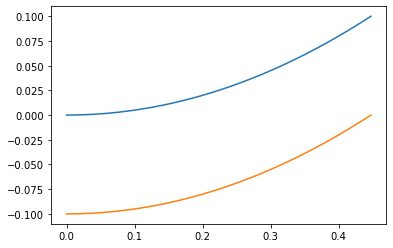

In [1]:
import matplotlib.pyplot as plt
import numpy as np

y = np.linspace(0, np.sqrt(2 * 0.1), 10000000)
g = y**2 / 2

plt.plot(y, g)
plt.plot(y, g - 0.1)

In [ ]:
# minimization

In [ ]:
# 3 bonds
# 2 angles
# 1 torsion

# stiffness values
k_bond = 1
k_angle = 1
k_torsion = 1

def energy():
    

In [235]:
# jeff williams thesis

elastic spring: name: kinf coord: x
arm spring: name: k0 coord: x, xd
arm damper: cd coord: x, xd, vd (velocity)

forces are the same within the arms, strain is the same across the arms
hookean force: fh = -kinf * x - k0 * (x - xd)
damper force: fc = -cd * vd

contact
-----------
x = ztip # prescribe a displacement, get out a force
fe = -kinf * x # calculate the force in the elastic element
farm = -k0 * (x - xd_i-1) # calculate the force in the arm
vd = -farm / cd # calculate the velocity of the damper from the force in the arm
xd = xd_i-1 + vd * dt # update the position of the damper from its velocity
fvdw = -A * R / (6 * a0^2) # calculate the adhesion force (a0 in contact is 2 Angstrom) (A in units of energy ~ 10e-21 J)
fts = fe + farm + fvdw # calculate the tip-sample force as a summation of all the forces present in the model

we must add some constraints to make this more physical:
-if the damper coefficient is small, the damper velocity update could be quite large and cause instabilities in the position of the damper.  specifically, it would be possible for the damper to pass the position of the tip / sample surface.  this case is impossible since the damper continuously relaxes to a state where the force in the arm spring is 0 - if the damper exceededs the height of the spring, it would be driving the system towards a non-zero force equilibrium.
-it is assumed that the tip and the sample do not separate during a single 'tap' (approach and retract).

non contact
-----------------
fvdw = -A * R / (6 * d^2) # calculate the adhesion force (d is the separation distance between the tip and the sample)
fe = -kinf * x_i-1 - fvdw # sum the forces in the elastic arm (vdw will pull the sample towards the tip)
farm = -fe # the forces in the arm are equal, but oriented in the reverse direction, to the elastic force (maintains equilibrium) (elastic spring pulls on the arms)
vd = -farm / cd # calculate the velocity of the damper
xd = xd_i-1 + vd * dt # update the position of the damper
x = kinf / (kinf + k0) * (xd_i-1 + vd * dt) # derivation below
fts = fvdw # the sample pulls the tip with adhesion

* derivation *
x = kinf / kinf + ko * xd
-start with:
fe = - farm -> kinf * x = -k0 * (x - xd)
-recall that: x = x_i-1 + dx and xd = xd_i-1 + vd * dt substitute to obtain:
kinf * (x_i-1 + dx) = -k0 * (x_i-1 + dx - xd_i-1 - vd * dt)
-rearrange and simplify:
kinf * x_i-1 + kinf * dx = -k0 * x_i-1 - k0 * dx + k0 * xd_i-1 + k0 * vd * dt
dx * (kinf + k0) = -x_i-1 * (kinf + k0) + k0 * xd_i-1 + k0 * vd * dt
dx = -x_i-1 + k0 / (kinf + k0) * (xd_i-1 + vd * dt)
-recall that: x = x_i-1 + dx substitute the form of dx found above ^
x = x_i-1 - x_i-1 + k0 / (kinf + k0) * (xd_i-1 + vd * dt)
x = k0 / (kinf + k0) * (xd_i-1 + vd * dt)


-the tip and sample are not in contact and the sample can relax to its original position
-the elastic spring (kinf) is now giving a force as an input and the output is the position of the surface

In [244]:
# all 0th entry elements must be properly initialized for the conditions of the simulation
i = 0
time = np.array([i for i in range(10)])
while (i := i + 1) < time.size - 1:
    # start at i=1
    # calculate values for i based off of values for i-1 (in the case that i=1, these are the initial conditions)
    print(time[i+1])

2
3
4
5
6
7
8
9


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [1]:
# modification to jeff method

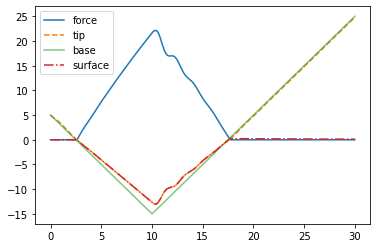

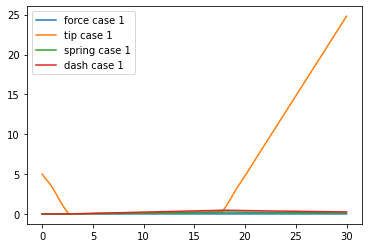

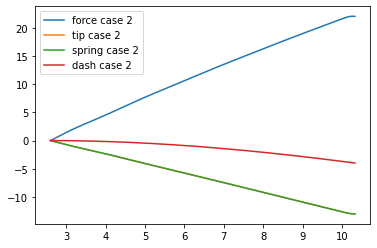

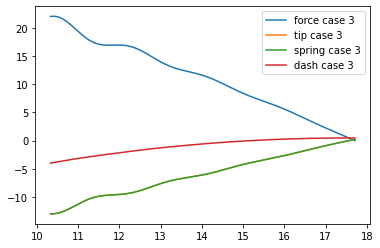

In [23]:
import matplotlib.pyplot as plt

# time
dt = 1e-5
tF = 30
time = np.arange(0, tF, dt)

# tip
m, k, b = 1, 10, 1
zb = np.zeros(time.shape)
zt = np.zeros(time.shape)
vt = np.zeros(time.shape)
at = np.zeros(time.shape)
zt[0] = zb[0] = 5
vt[0] = - 2

# sample
zs = np.zeros(time.shape) + 0.0
zc = np.zeros(time.shape) + zs[0]
vc = np.zeros(time.shape)
ke, k1, c1, A, a0 = 1, 1, 10, 1e-15, 1e-4

# forces
f_ts = np.zeros(time.shape)
f_adh = np.zeros(time.shape)

# simulation
case_1, case_2, case_3 = [], [], []
i = 0
while (i := i + 1) < time.size:
    # move base
    zb[i] = zb[i - 1] + dt * abs(vt[0]) * (- 1 + 2 * (i > 20 / 2 / dt))
    
    # integrate eom
    zt[i] = zt[i-1] + vt[i-1] * dt + 1 / 2 * at[i-1] * dt ** 2
    at[i] = (-k * zt[i-1] - b * vt[i-1] + k * zb[i-1] + f_ts[i-1]) / m
    vt[i] = vt[i-1] + 1 / 2 * (at[i-1] + at[i]) * dt
    
    # calculate tip-sample force
    # case 1: no contact between tip and sample
    if zt[i] > zs[i - 1] + a0:
        vc[i - 1] = (ke * (zs[0] - zs[i-1]) - f_adh[i - 1]) / c1
        zc[i] = zc[i - 1] + vc[i - 1] * dt
        zs_tentative = (ke * zs[0] + k1 * (vc[i - 1] * dt + zc[i - 1]) + f_adh[i - 1]) / (ke + k1)
        
        # case 3: the surface (zs_tentative) jumps above the tip (zt) @ the given instance i
        if zs_tentative > zt[i] - a0:
            zs[i] = zt[i] - a0
            #f_adh[i] = - A / a0**2
            
            f_ts[i] = ke * (zs[0] - zs[i]) + k1 * (zc[i] - zs[i]) + f_adh[i]
            case_3.append(i)
            
        # continue case 1: no contact between tip and sample
        else:
            zs[i] = zs_tentative
            #f_adh[i] = - A / (zt[i] - zs[i])**2
            f_ts[i] = f_adh[i]
            case_1.append(i)
            
    # case 2: the tip pushes the sample down
    else:
        zs[i] = zt[i] - a0
        vc[i - 1] = - k1 * (zc[i - 1] - zs[i - 1]) / c1
        zc[i] = zc[i - 1] + vc[i - 1] * dt
        #f_adh[i] = - A / a0**2
        f_ts[i] = ke * (zs[0] - zs[i]) + k1 * (zc[i] - zs[i]) + f_adh[i]
        case_2.append(i)
        
    # when force becomes negative, the sample will have detached from the surface
#     if f_ts[i] < 0:
#         print('negative force at {}'.format(i))

plt.plot(time, f_ts, label='force')
plt.plot(time, zt, '--', label='tip')
plt.plot(time, zb, alpha=0.6, label='base')
plt.plot(time, zs, '-.', label='surface')
plt.legend()
plt.show()

plt.plot(time[case_1], f_ts[case_1], label='force case 1')
plt.plot(time[case_1], zt[case_1], label='tip case 1')
plt.plot(time[case_1], zs[case_1], label='spring case 1')
plt.plot(time[case_1], zc[case_1], label='dash case 1')
plt.legend()
plt.show()

plt.plot(time[case_2], f_ts[case_2], label='force case 2')
plt.plot(time[case_2], zt[case_2], label='tip case 2')
plt.plot(time[case_2], zs[case_2], label='spring case 2')
plt.plot(time[case_2], zc[case_2], label='dash case 2')
plt.legend()
plt.show()

plt.plot(time[case_3], f_ts[case_3], label='force case 3')
plt.plot(time[case_3], zt[case_3], label='tip case 3')
plt.plot(time[case_3], zs[case_3], label='spring case 3')
plt.plot(time[case_3], zc[case_3], label='dash case 3')
plt.legend()
plt.show()

# notes:
# case 1 seems to cause an issue with the spring and damper

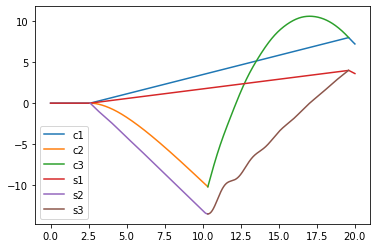

In [17]:
plt.plot(time[case_1], zc[case_1], label='c1')
plt.plot(time[case_2], zc[case_2], label='c2')
plt.plot(time[case_3], zc[case_3], label='c3')

plt.plot(time[case_1], zs[case_1], label='s1')
plt.plot(time[case_2], zs[case_2], label='s2')
plt.plot(time[case_3], zs[case_3], label='s3')

plt.legend()
plt.show()

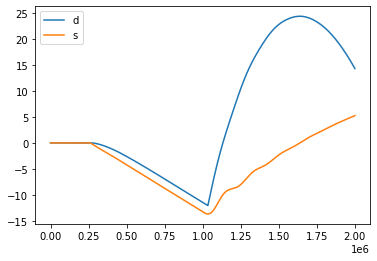

In [7]:
plt.plot(zc, label='d')
plt.plot(zs, label='s')
#plt.plot(zt, label='t')
plt.legend()
plt.show()

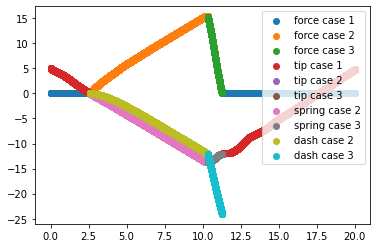

In [99]:
plt.scatter(time[case_1], f_ts[case_1], label='force case 1')
plt.scatter(time[case_2], f_ts[case_2], label='force case 2')
plt.scatter(time[case_3], f_ts[case_3], label='force case 3')
plt.scatter(time[case_1], zt[case_1], label='tip case 1')
plt.scatter(time[case_2], zt[case_2], label='tip case 2')
plt.scatter(time[case_3], zt[case_3], label='tip case 3')
#plt.scatter(time[case_1], zs[case_1], label='spring case 1')
plt.scatter(time[case_2], zs[case_2], label='spring case 2')
plt.scatter(time[case_3], zs[case_3], label='spring case 3')
#plt.scatter(time[case_1], zc[case_1], label='dash case 1')
plt.scatter(time[case_2], zc[case_2], label='dash case 2')
plt.scatter(time[case_3], zc[case_3], label='dash case 3')
plt.legend()
plt.show()

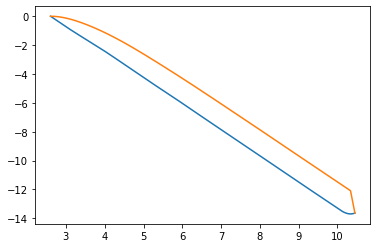

In [84]:
plt.plot(time[zc>zs], zs[zc > zs])
plt.plot(time[zc>zs], zc[zc > zs])

In [236]:
# R-MDR Method

In [233]:
time = np.arange(0, 4, 0.00001)
dt = time[1]

tip_vel = 200 * 1e-9
tip_pos = (100 * 1e-9) - time * (tip_vel * (time < 2)) +  (time * tip_vel - 4 * tip_vel )*(time >= 2)
force = time * 0.0
d = time * 0.0 # indentation

Ge = 1e2
G1 = 1e6
T1 = 5e-1

R = 10e-9  # contact radius

def strain_flat_circle_punch(indentation):  # hertzian cylindrical contact (indentation -> strain)
    # F / A = 2 R Estar d / A
    # idea is that sigma = Estar strain (by similarity, strain must be ...)
    # elastic spring (arm) in maxwell model should follow this equation
    return 2 * indentation / (np.pi * R)

def force_flat_circle_punch_elastic(indentation, E):  # hertzian cylindrical contact
    return 2 * R * E * indentation
    
def force_spherical_elastic(indentation, E):  # hertzian spherical contact
    return 4 / 3 * E * R**(1 / 2) * indentation**(3/2)

def strain_spherical(indentation):  # hertzian spherical contact (indentation -> strain)
    # similar argument to above function just starting with spherical equation
    return 4 / (3 * np.pi) * R**(-1 / 2) * indentation**(1 / 2)


surface_pos = 0
force_elastic = time * 0
strain_elastic = time * 0
force_arm = time * 0 # would become a matrix for more arms
stress_arm = time * 0

strain = time * 0

total_force = time * 0

e = 0
while (e := e + 1) < time.size:
    if tip_pos[e] > 0: # no contact
        force[e] = 0.0
    else: # contact(
        d[e] = (surface_pos - tip_pos[e]) * (tip_pos[e] < surface_pos)
        strain_elastic[e] = strain_flat_circle_punch(d[e])
        force_elastic[e] = force_flat_circle_punch_elastic(d[e], Ge)
        
        area = np.pi * R * R # contact geometry dependent
        stress_arm[e] = ((strain_elastic[e] - strain_elastic[e-1]) / dt) / (((1 - stress_arm[e-1]) / (dt * G1)) + (1 / (G1 * T1)))
        force_arm[e] = stress_arm[e] * area
        
        total_force[e] = force_arm[e] + force_elastic[e]

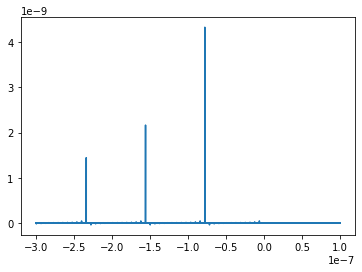

In [234]:
plt.plot(tip_pos, total_force)

In [101]:
# minimization testing